# Exploratory Data Analysis

## 1. Data Description

- This dataset described whether an individual donates blood or not based on past donation history.
- This is a dataset that originally from the paper *Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence," Expert Systems with Applications, 2008* and can be found on the UCI machine learning repository at: https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center.

## 2. Load the Dataset

In [1]:
import datapackage
import pandas as pd
from sklearn.model_selection import train_test_split
import altair as alt 

In [2]:
data_url = 'https://datahub.io/machine-learning/blood-transfusion-service-center/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        blood_df = pd.read_csv(resource.descriptor['path'])

In [3]:
blood_df.head()

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [4]:
X = blood_df.iloc[:,0:-1]
y = blood_df.iloc[:,-1]
# split training and testing
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, random_state = 123)

In [5]:
blood_df_train = X_train
blood_df_train = pd.merge(blood_df_train, y_train, left_index=True, right_index=True)
blood_df_train.head()

,V1,V2,V3,V4,Class
239,8,9,2250,58,1
269,13,4,1000,21,1
151,4,6,1500,39,1
245,4,5,1250,46,1
59,3,6,1500,21,1


In [6]:
blood_df_train = blood_df_train.rename(columns={"V1": "since_last_don", "V2": "total_dons", "V3": "total_blood", "V4": "since_first_don"})

## 3. Explore the Dataset

In [7]:
blood_df_train.isna().any()

since_last_don     False
total_dons         False
total_blood        False
since_first_don    False
Class              False
dtype: bool

> We can see that there are no missing values in our dataset.

In [8]:
print(blood_df_train.shape)
print(blood_df_train.columns)

(598, 5)
Index(['since_last_don', 'total_dons', 'total_blood', 'since_first_don',
       'Class'],
      dtype='object')


> The dataset has 5 columns, 4 different features and our target which is whether they have donated or not, represented by a binary variable with 1 being not donated and 2 being donated. The `since_last_don` and `since_first_don` columns are time in months.

In [9]:
#general summary for all data
blood_df_train.describe()

,since_last_don,total_dons,total_blood,since_first_don,Class
count,598.000000,598.000000,598.000000,598.000000,598.000000
mean,9.951505,5.653846,1413.461538,35.030100,1.230769
std,8.399130,5.939018,1484.754538,24.345691,0.421678
min,0.000000,1.000000,250.000000,2.000000,1.000000
25%,4.000000,2.000000,500.000000,16.000000,1.000000
50%,9.000000,4.000000,1000.000000,28.000000,1.000000
75%,14.750000,7.000000,1750.000000,50.750000,1.000000
max,74.000000,50.000000,12500.000000,98.000000,2.000000


In [10]:
#Summary for positive class, which is donated
blood_df_train[blood_df_train['Class']==1].describe()

,since_last_don,total_dons,total_blood,since_first_don,Class
count,460.000000,460.000000,460.000000,460.000000,460.0
mean,11.315217,4.969565,1242.391304,36.121739,1.0
std,8.699697,4.908215,1227.053762,24.566267,0.0
min,0.000000,1.000000,250.000000,2.000000,1.0
25%,4.000000,2.000000,500.000000,16.000000,1.0
50%,11.000000,3.000000,750.000000,28.000000,1.0
75%,16.000000,7.000000,1750.000000,52.000000,1.0
max,74.000000,44.000000,11000.000000,98.000000,1.0


In [11]:
#Summary for negative class, which is not Donated
blood_df_train[blood_df_train['Class']==2].describe()

,since_last_don,total_dons,total_blood,since_first_don,Class
count,138.000000,138.000000,138.000000,138.000000,138.0
mean,5.405797,7.934783,1983.695652,31.391304,2.0
std,5.175233,8.134998,2033.749576,23.314240,0.0
min,0.000000,1.000000,250.000000,2.000000,2.0
25%,2.000000,3.000000,750.000000,15.000000,2.0
50%,4.000000,6.000000,1500.000000,28.000000,2.0
75%,4.000000,10.000000,2500.000000,41.750000,2.0
max,26.000000,50.000000,12500.000000,98.000000,2.0


Comparing the summary for donated vs not donated class. We can see that the people donated is around 3 times than the people are not donated.

## 4. Data Visualizations

In [12]:
blood_df_train

,since_last_don,total_dons,total_blood,since_first_don,Class
239,8,9,2250,58,1
269,13,4,1000,21,1
151,4,6,1500,39,1
245,4,5,1250,46,1
59,3,6,1500,21,1
...,...,...,...,...,...
98,4,4,1000,14,2
322,11,4,1000,34,1
382,14,1,250,14,1
365,14,2,500,21,2


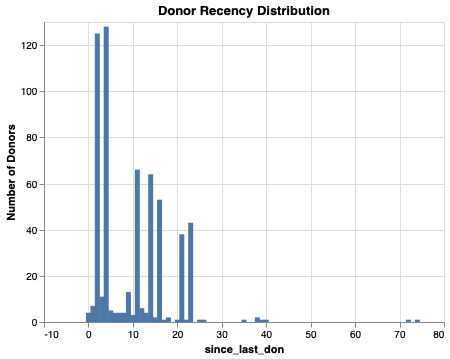

In [20]:
alt.Chart(blood_df_train).mark_bar().encode(
    alt.X("since_last_don"),
    alt.Y("count()", title = "Number of Donors"),
).properties(title = "Donor Recency Distribution")

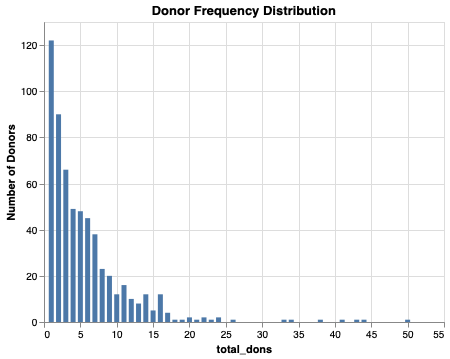

In [21]:
alt.Chart(blood_df_train).mark_bar().encode(
    alt.X("total_dons"),
    alt.Y("count()", title = "Number of Donors"),
).properties(title = "Donor Frequency Distribution")

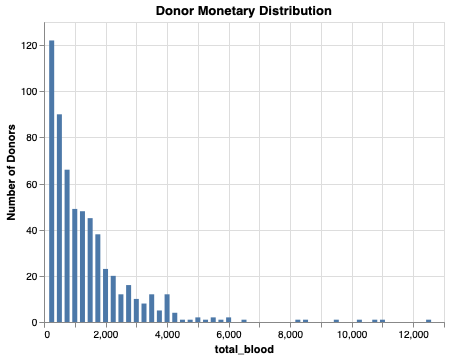

In [22]:
alt.Chart(blood_df_train).mark_bar().encode(
    alt.X("total_blood"),
    alt.Y("count()", title = "Number of Donors"),
).properties(title = "Donor Monetary Distribution")

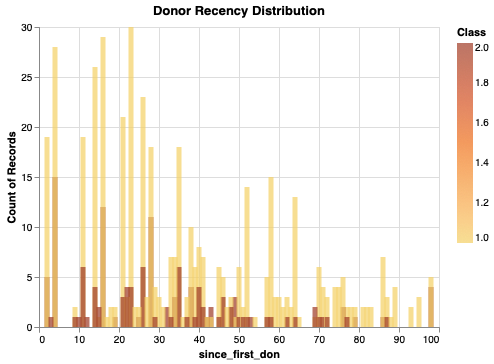

In [25]:
alt.Chart(blood_df_train).mark_bar(opacity = 0.7).encode(
    alt.X("since_first_don"),
    alt.Y('count()', stack=None),
    color=alt.Color('Class', scale=alt.Scale(scheme='goldorange'))
).properties(title = "Donor Recency Distribution")

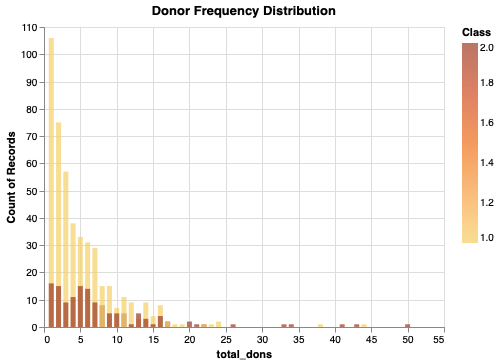

In [26]:
alt.Chart(blood_df_train).mark_bar(opacity = 0.7).encode(
    alt.X("total_dons"),
    alt.Y('count()', stack=None),
    color=alt.Color('Class', scale=alt.Scale(scheme='goldorange'))
).properties(title = "Donor Frequency Distribution")

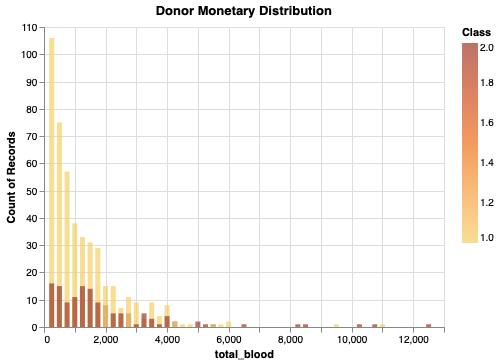

In [27]:
alt.Chart(blood_df_train).mark_bar(opacity = 0.7).encode(
    alt.X("total_blood"),
    alt.Y('count()', stack=None),
    color=alt.Color('Class', scale=alt.Scale(scheme='goldorange'))
).properties(title = "Donor Monetary Distribution")

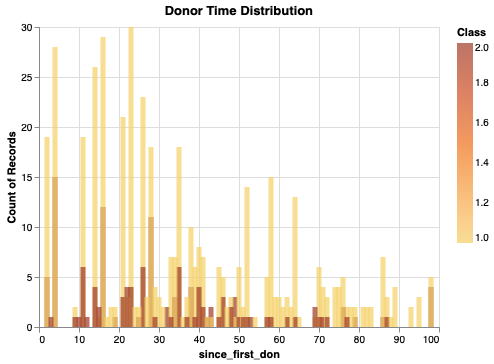

In [28]:
alt.Chart(blood_df_train).mark_bar(opacity = 0.7).encode(
    alt.X("since_first_don"),
    alt.Y('count()', stack=None),
    color=alt.Color('Class', scale=alt.Scale(scheme='goldorange'))
).properties(title = "Donor Time Distribution")